这是一个有部分代码缺失的notebook，需要完成的就是将 ### START CODE HERE ### ### END CODE HERE ###之间的代码补全

# 线性回归
  
某城市的电网系统需要升级，以应对日益增长的用电需求。电网系统需要考虑最高温度对城市的峰值用电量的影响。项目负责人需要预测明天城市的峰值用电量，他搜集了以往的数据。现在，负责人提供了他搜集到的数据，并请求你帮他训练出一个模型，这个模型能够很好地预测明天城市的峰值用电量。

## 1- 准备

先导入必要的python包

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

导入负责人提供的数据，并可视化数据

X shape: (80, 1)
Y shape: (80, 1)
some X[:5]:
 [[38.24]
 [36.53]
 [32.92]
 [26.59]
 [20.05]]
some Y[:5]:
 [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


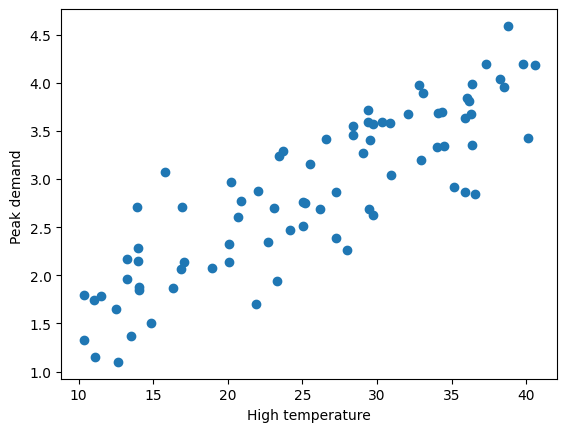

In [2]:
data = np.loadtxt('data.txt')
#data 第一列为温度信息 第二列为人口信息
X_raw = data[:,0].reshape(-1,1) # reshape 第一维自己计算 第二维度变成1维度 也就是变成只有一个元素的列表
#data 第三列为用电量信息
Y = data[:,2].reshape(-1,1)
plt.xlabel('High temperature')
plt.ylabel('Peak demand ')
plt.scatter(X_raw,Y)
print('X shape:',X_raw.shape)
print('Y shape:',Y.shape)
print('some X[:5]:\n',X_raw[:5])
print('some Y[:5]:\n',Y[:5])

根据对数据可视化结果的分析，决定使用回归算法训练一个模型，用来预测明天城市的峰值用电量。首先考虑单变量的线性回归模型。

## 2- 单变量线性回归理论介绍

### 单变量线性回归模型

单变量线性回归的模型由两个参数$\theta_0$,$\theta_1$来表示一条直线：$$Peak\ demand \approx \theta_0 + \theta_1 \cdot (High\ temperature) 。$$

我们的目标也就是找到一条"最符合"的直线，确定这条直线的参数$\theta_i$。
  
![functions](images/lines.jpg)  
设输入的特征——最高温度(F)为$x^{(i)} \in \mathbb{R}^{n+1}$，$i=1,\cdots,m$。$m$为样本总数，在该例子中$m$=80。$n$为特征的个数，这里为$1$。则：$x^{(i)} \in \mathbb{R}^2 = \begin{bmatrix} 1 \\ \text{high temperature for day} i\end{bmatrix}。$

设输出为$y^{(i)} \in \mathbb{R}$，表示第$i$天的峰值用电量。

参数为$\theta \in \mathbb{R}^{n+1} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}$。这里$n=1$。

在该例子中，模型为一条直线，模型可表示为：
$$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x 。$$
### **注意**：
这里的$\theta^T$是一个向量，$\theta_0,\theta_1$是标量。使用向量化表示的原因为：
（1）简化数学公式的书写
（2）与程序代码中的表示保持一致，且使用向量化的代码实现可以加速运算，**因此一般能不用`for`循环的地方都不用`for`循环**。

下面用一个简单的例子说明向量化的代码运算更快。


In [3]:
# 随机初始化两个向量，计算它们的点积
x = np.random.rand(10000000,1)
y = np.random.rand(10000000,1)
ans = 0
start = time.time()
for i in range(10000000):
    ans += x[i,0]*y[i,0]
end = time.time()
print('for循环的计算时间: %.2fs'%(end - start))
print('计算结果：%.2f'%(ans))
start = time.time()
ans = np.dot(x.T,y)
end = time.time()
print('向量化的计算时间: %.2fs'%(end - start))
print('计算结果：%.2f'%(ans))

for循环的计算时间: 3.14s
计算结果：2500154.76
向量化的计算时间: 0.01s
计算结果：2500154.76


因为$\theta_0 + \theta_1 x=\begin{bmatrix} 1 \quad x \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} 。$
因此，为了方便编程，我们需要给每一个$x^{(i)}$的前面再加一列1。使得每一个$x^{(i)}$成为一个2维向量。

### 预测结果

模型需要根据输入自变量 $x^{(i)}$ 和参数 $\theta$ 来输出预测结果 $predict\_y^{(i)}$。

将自变量 $x^{(i)}$ 作为模型的输入，模型根据输入和当前参数 $\theta$ 输出预测结果：

$$
predict\_y^{(i)} = h_\theta(x^{(i)})。
$$

其中 $h_\theta()$ 为模型在参数为 $\theta$ 情况下，对于输入的预测函数。  


在预测阶段，$x$作为自变量。

### 损失函数

模型的预测结果和实际结果有差距，为了衡量它们之间的差距，或者说量化使用这个模型产生的损失，我们定义损失函数$l(predict\_y^{(i)}, y^{(i)})$。这里我们使用平方损失：
$$
l(predict\_y, y) = \left ( predict\_y^{(i)} - y^{(i)} \right )^2。
$$

上述损失函数表示一个样本的损失，整个训练集的损失使用$J(\theta)$表示：
$$
\begin{aligned}
J(\theta) & = \frac{1}{2m} \sum_{i=1}^{m}l(predict\_y^{(i)}, y^{(i)}) \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( h_\theta(x^{(i)}) - y^{(i)} \right )^2 \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y^{(i)} \right )^2。
\end{aligned}
$$
（其中数字2的作用是方便求导时的运算）

为了使模型取得较好的预测效果，需要最小化训练集上的损失，即$\underset{\theta}{\min} J(\theta)$。

在损失阶段，$\theta$ 作为自变量。


### 梯度下降法

为了得到使损失函数$J(\theta)$最小化的$\theta$，可以使用梯度下降法。

损失函数$J(\theta)$的函数图像如下：  
![损失函数J](images/loss_function_j.png)

损失函数$J(\theta)$关于参数向量$\theta$中的一个参数，比如$\theta_1$的函数图为：  
![theta-J 函数图](images/theta-J.png)

假设一开始$J(\theta)$的值在紫色点上，为了降低$J(\theta)$值，需要$\theta_1$往右边移动，这个方向是$J(\theta)$在$\theta_1$上的负梯度。只要$\theta$不断往负梯度方向移动，$J(\theta)$一定可以降到最低值。梯度下降法就是使参数$\theta$不断往负梯度移动，经过有限次迭代(更新$\theta$值)之后，损失函数$J(\theta)$达到最低值。

梯度下降法的过程：
1. 初始化参数向量$\theta$。

2. 开始迭代

   A.根据实际输入$x$和参数$\theta$预测输出，
   
   B. 根据预测输出值和实际输出值之间的差距，计算损失函数$J(\theta)$，
   
   C. 计算损失函数对$\theta$的梯度，
   
   D. 更新参数$\theta$。



# 3- 实现单变量线性回归模型 

现在，我们开始实现 Regression 算法。

### **任务1：** 
首先在$X$前面加上一列1，表示参数$\theta_0$的系数，方便运算。$X$是形状为$(m,1)$的矩阵，一共$m$行数据，我们需要为每一行数据的前面加一列1，如下所示：  
$$
\begin{bmatrix} x^{(0)} \\ x^{(1)} \\ \vdots \\x^{(m-1)}  \end{bmatrix} \longrightarrow
\begin{bmatrix} 1\quad x^{(0)} \\ 1\quad x^{(1)} \\ \vdots \\ 1\ x^{(m-1)}  \end{bmatrix}。
$$
**提示**：可以使用`np.hstack`把两个矩阵水平合在一起。用1初始化向量或矩阵的函数是`np.ones`。(函数详情可使用python的帮助函数`help`，比如`help(np.ones)`，或者自行用搜索引擎检索。)

In [4]:
help(np.hstack)

Help on function hstack in module numpy:

hstack(tup, *, dtype=None, casting='same_kind')
    Stack arrays in sequence horizontally (column wise).
    
    This is equivalent to concatenation along the second axis, except for 1-D
    arrays where it concatenates along the first axis. Rebuilds arrays divided
    by `hsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        The arrays must have the same shape along all but the second axis,
        except 1-D arrays which can be any length.
    
    dtype : str or dtype
        If provided, the destination array will have this dtype. Cannot be
        provided together with `out`.
    
    .. versionadded:: 1.24

In [5]:
help(np.ones)

Help on function ones in module numpy:

ones(shape, dtype=None, order='C', *, like=None)
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.
    
        .. versionad

In [6]:
print(np.ones((10,1)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [7]:
def preprocess_data(X):
    """输入预处理 在X前面加一列1
    参数：
        X:原始数据,shape为(m,1)
        
    返回：
        X_train: 在X加一列1的数据,shape为(m,2)
    """

    m = X.shape[0]   # m 是数据X的行数
    ### START CODE HERE ###
    X_train = np.hstack((np.ones((m,1)),X))
    
    ### END CODE HERE ###
    return X_train

In [8]:
X = preprocess_data(X_raw)
print('new X shape:',X.shape)
print('Y shape:',Y.shape)
print('new X[:5,:]=\n',X[:5,:])
print('Y[:5,:]=\n',Y[:5,:])

new X shape: (80, 2)
Y shape: (80, 1)
new X[:5,:]=
 [[ 1.   38.24]
 [ 1.   36.53]
 [ 1.   32.92]
 [ 1.   26.59]
 [ 1.   20.05]]
Y[:5,:]=
 [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


### **任务2：** 
接着，初始化参数向量$\theta$。$\theta$的shape是$(2,1)$，我们随机初始化$\theta$。

**提示**：numpy的随机函数是`np.random.rand`。

In [9]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [10]:
def init_parameter(shape):
    """初始化参数
    参数：
        shape: 参数形状
        
    返回：
        theta_init: 初始化后的参数
    """
    
    np.random.seed(0)
    m, n = shape
    ### START CODE HERE ###

    theta_init = np.random.rand(m,n)

    ### END CODE HERE ###
    
    return theta_init

In [11]:
theta = init_parameter((2,1))
print('theta shape is ',theta.shape)
print('theta = ',theta)

theta shape is  (2, 1)
theta =  [[0.5488135 ]
 [0.71518937]]


### **任务3：** 
通过已知 $X$ 和参数 $\theta$ 计算预测的 $predict\_Y$ 值。

由于使用`for`循环单独计算每个预测值效率不高，因此我们需要用向量化的方法代替`for`循环。$X$ 大小为$m \times (n+1)$($n$表示特征数量，这里$n=1$)，每行是一条样本特征向量，$\theta$ 大小为$(n+1) \times 1$，可以使用$X \theta$（矩阵相乘）计算所有样本的预测结果,大小为$m\times 1$。于是这里的线性模型就可以表示为：
$$
h_{\theta}(X) = X \theta。
$$
这里$h_{\theta}(X)$的大小为$m \times 1$，结果上等于 $predict\_Y_\theta$。

**提示**：矩阵相乘 `np.dot(矩阵1，矩阵2)`。

In [12]:
def compute_predict_Y(X,theta):
    """计算预测结果
    参数：
        X: 训练集数据特征,shape: (m, 2)
        theta: 参数,shape: (2, 1)

    返回：
        predict_Y: 预测结果,shape: (m,1)
    """
    
    ### START CODE HERE ###
    predict_Y = np.dot(X,theta)
    ### END CODE HERE ###
    return predict_Y
predict_Y = compute_predict_Y(X,theta)
print(predict_Y[:5])

[[27.89765487]
 [26.67468106]
 [24.09284744]
 [19.56569876]
 [14.8883603 ]]


### **任务4：** 
实现计算损失函数$J(\theta)$的函数。   
从公式
$$
\begin{aligned}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left ( predict\_y_\theta^{(i)} - y_\theta^{(i)} \right )^2
\end{aligned}
$$
可以看到有个求和，由于使用`for`循环效率不高，因此需要用向量化的方法代替`for`循环。$(predict\_Y - Y)^2$计算所有样本的损失值，最后求和并除以$2m$得到$J(\theta)$的值，得到的$J(\theta)$是一个标量。   
**提示**：矩阵乘法运算可使用`np.dot`函数，平方运算可使用`np.power(data, 2)`函数，求和运算可使用`np.sum`。

In [13]:
def compute_J(predict_Y, Y):
    """计算损失的函数J
    参数：
        predict_Y: 预测结果,shape: (m, 1)
        Y: 训练集数据标签,shape: (m, 1)
        
    返回：
        loss: 损失值
    """
    
    m = Y.shape[0]
    
    ### START CODE HERE ###

    loss = np.sum(np.power(predict_Y-Y,2))/(2*m)
    
    ### END CODE HERE ###
    
    return loss

In [14]:
first_loss = compute_J(predict_Y, Y)
print("first_loss = ", first_loss)

first_loss =  144.05159786255672


### **任务5：**
计算参数$\theta$的梯度。梯度计算的公式为：
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y \right ) x_j^{(i)}。
$$
向量化公式为：
$$
\text{gradients} =\frac{1}{m} X^T (X \theta - Y) 。
$$
**提示**：矩阵A的转置表示为`A.T`。$X\theta$就是计算出的predict_Y。

In [15]:
def compute_gradient(predict_Y, Y, X):
    """计算对参数theta的梯度值
    参数：
        predict_Y: 当前预测结果,shape: (m,1)
        Y: 训练集数据标签,shape: (m, 1)
        X: 训练集数据特征,shape: (m, 2)
        
    返回：
        gradients: 对theta的梯度,shape:(2,1)
    """
    
    m = X.shape[0]
    
    ### START CODE HERE ###

    gradients = np.dot(X.T,predict_Y-Y)/m

    ### END CODE HERE ###
    
    return gradients

In [16]:
gradients_first = compute_gradient(predict_Y, Y, X)
print("gradients_first shape : ", gradients_first.shape)
print("gradients_first = ", gradients_first)


gradients_first shape :  (2, 1)
gradients_first =  [[ 16.0079445 ]
 [459.96770081]]


### **任务6：**
用梯度下降法更新参数$\theta$,实现`update_parameters`函数。

**提示**：parameters = $\theta$ - $learning\_rate·gradients$



In [17]:
def update_parameters(theta, gradients, learning_rate=0.0001):
    """更新参数theta
    参数：
        theta: 参数,shape: (2, 1)
        gradients: 梯度,shape: (2, 1)
        learning_rate: 学习率,默认为0.0001
        
    返回：
        parameters: 更新后的参数,shape: (2, 1)
    """
    ### START CODE HERE ###

    parameters = theta - learning_rate * gradients

    ### END CODE HERE ###
    
    return parameters

In [18]:
theta_one_iter = update_parameters(theta, gradients_first)

print("theta_one_iter = ", theta_one_iter)

theta_one_iter =  [[0.54721271]
 [0.6691926 ]]


### **任务7：**
将前面定义的函数整合起来，实现完整的模型训练函数。

$\theta$迭代更新 `iter_num`次。迭代次数`iter_num`也是一个超参数，如果`iter_num`太小，损失函数$J(\theta)$还没有收敛；如果`iter_num`太大，损失函数$J(\theta)$早就收敛了，过多的迭代浪费时间。

In [19]:
def model(X, Y, theta, iter_num = 100, learning_rate=0.0001):
    """线性回归模型
    参数：
        X: 训练集数据特征,shape: (m, n+1)
        Y: 训练集数据标签,shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta: 初始化的参数,shape: (n+1, 1)
        learning_rate: 学习率,默认为0.0001
        
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        # 预测
        predict_Y = compute_predict_Y(X, theta)
        # 计算损失
        loss = compute_J(predict_Y, Y)
        # 计算梯度
        gradients = compute_gradient(predict_Y, Y, X)
        # 更新参数
        theta = update_parameters(theta, gradients, learning_rate)
        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta

theta =  [[0.52732144]
 [0.09027749]]
loss =  0.09087253295782578


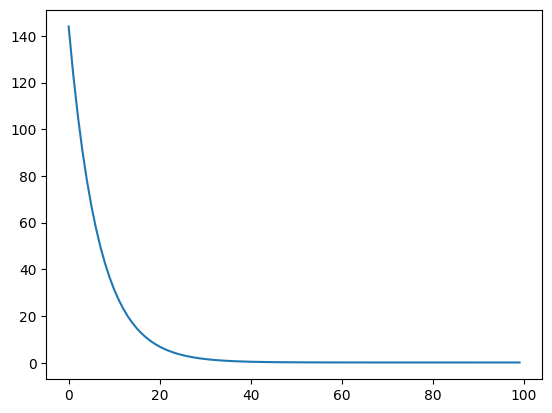

In [20]:
# 感兴趣的同学可以自行尝试不同的学习率和迭代次数，最后提交时以100次迭代和0.0001的学习率重新运行一遍再提交

loss_history, theta_history, theta = model(X, Y, theta, iter_num=100, learning_rate=0.0001)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

下面是学习到的线性模型与原始数据的关系可视化。

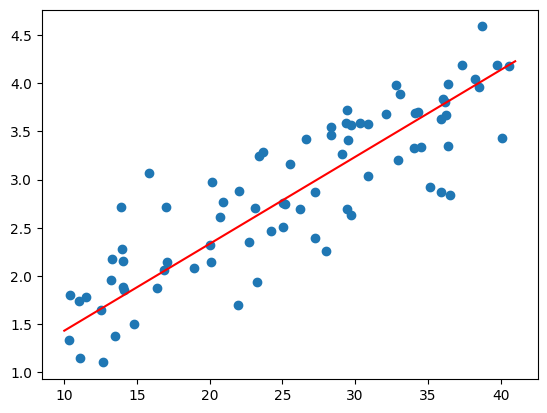

In [21]:
plt.scatter(X[:,1],Y)
x = np.arange(10,42)
plt.plot(x,x*theta[1][0]+theta[0][0],'r')

现在直观地了解一下梯度下降的过程。

(50, 50)
(50, 50)
(80, 1)
(50, 50)


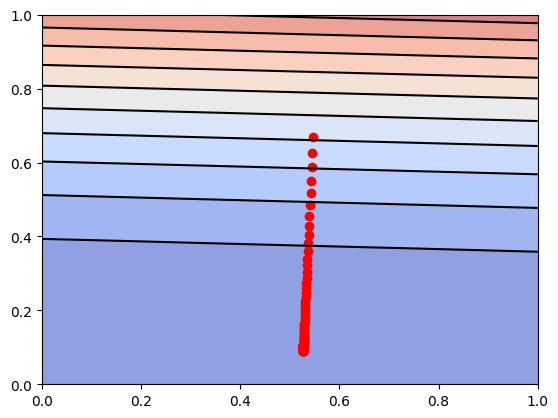

In [22]:
theta_0 = np.linspace(0, 1, 50)
theta_1 = np.linspace(0, 1, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)
predict_Ys = np.zeros_like(predict_Y)
print(theta_0.shape)
print(theta_1.shape)
print(predict_Ys.shape)
print(J.shape)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X, np.array([[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][0,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。在y轴，$J(\theta)$下降的比较快，在x轴，$J(\theta)$下降的比较慢。

## 4- 实现多变量线性回归模型
上述例子是单变量回归的例子，样本的特征只有一个一天的最高温度。负责人经过分析后发现，城市一天的峰值用电量还与城市人口有关系，因此，他在回归模型中添加城市人口变量$x_2$，你的任务是训练这个多变量回归方程：
$$
h(x) = \theta^T x = \theta_0 * 1 + \theta_1 * x_1 + \theta_2 * x_2。
$$
之前实现的梯度下降法使用的对象是$\theta$和$X$向量，实现的梯度下降函数适用于单变量回归和多变量回归。不难发现上面使用的向量化公式在多变量回归里依然不变，因此代码也基本一致,直接调用前面实现的函数即可。

### **任务8：** 
现在，训练一个多变量回归模型。

theta =  [[0.52593585]
 [0.06715361]
 [0.57583208]]
loss =  0.10300473270580184


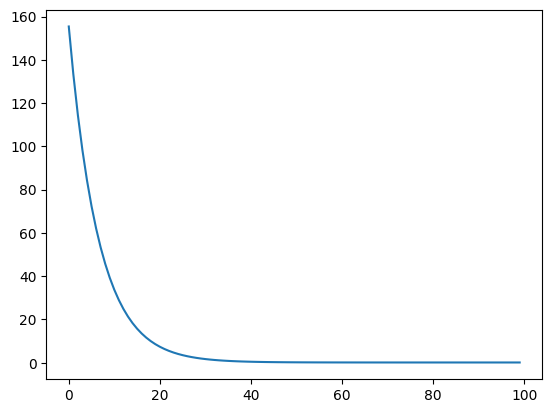

In [23]:
#读取数据，X取data的前两列
X = data[:,0:2].reshape(-1, 2)
Y = data[:,2].reshape(-1, 1)

### START CODE HERE ###

# 直接调用上面实现过的函数
# 同样为X的前面添加一列1,使得X的shape从80x2 -> 80x3
X = preprocess_data(X)
# 初始化参数theta ,theta的shape应为 3x1
theta = init_parameter((3, 1))
# 传入模型训练,learning_rate设为0.0001
loss_history, theta_history, theta = model(X, Y, theta)

### END CODE HERE ###

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

# 5- 特征归一化

特征归一化可以确保特征在相同的尺度，加快梯度下降的收敛过程。

### **任务9：** 
对数据进行零均值单位方差归一化处理。零均值单位方差归一化公式：
$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$
其中$i$表示第$i$个特征，$\mu_i$表示第$i$个特征的均值，$\sigma_i$表示第$i$个特征的标准差。进行零均值单位方差归一化处理后，数据符合标准正态分布，即均值为0，标准差为1。
  
**注意**，使用新样本进行预测时，需要对样本的特征进行相同的缩放处理。

**提示**：求特征的均值，使用numpy的函数`np.mean`;求特征的标准差，使用numpy的函数`np.std`，需要注意对哪个维度求均值和标准差。比如，对矩阵A的每列求均值`np.mean(A,axis=0)`。

In [24]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. 

mu =  [25.617  1.131]
sigma =  [8.8648434 0.3606716]
theta =  [[2.86181356]
 [0.70424286]
 [0.04097817]]
loss =  0.08591601385802586


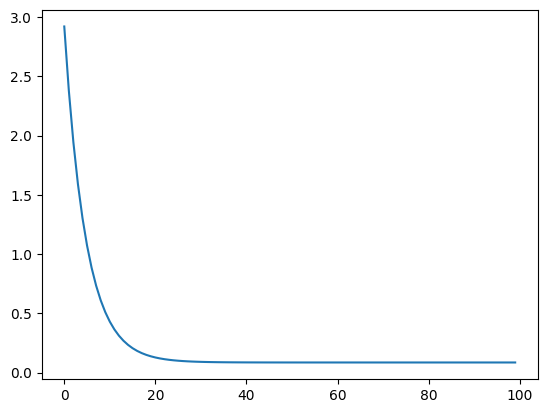

In [25]:
X = data[:,0:2].reshape((-1, 2))
Y = data[:,2].reshape((-1, 1))

### START CODE HERE ###

# 计算特征的均值 mu
mu = np.mean(X, axis=0)
# 计算特征的标准差 sigma
sigma = np.std(X, axis=0)
# 零均值单位方差归一化
X_norm = (X - mu)/sigma

# 训练多变量回归模型
# X_norm前面加一列1
X = preprocess_data(X_norm)
# 初始化参数theta
theta = init_parameter((3,1))
# 传入模型训练,learning_rate设为0.1
loss_history, theta_history, theta = model(X, Y, theta, 100, 0.1)

### END CODE HERE ###

print("mu = ", mu)
print("sigma = ", sigma)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

我们来直观地了解特征尺度归一化的梯度下降的过程。这里只展示单变量回归梯度下降过程。

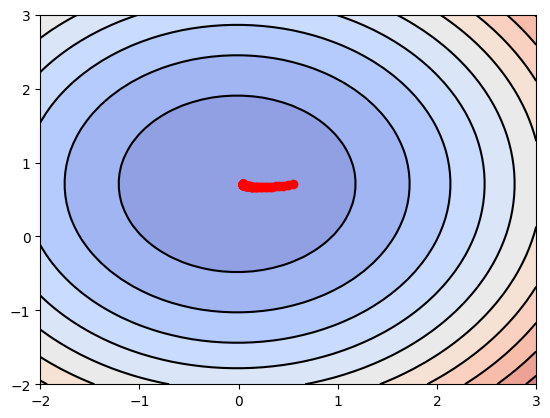

In [26]:
X_show = X[:,0:2]
X_show = preprocess_data(X_show)

theta_0 = np.linspace(-2, 3, 50)
theta_1 = np.linspace(-2, 3, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X_show, np.array([[2.877],[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][2,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。与没有进行特征尺度归一化的图相比，归一化后，每个维度的变化幅度大致相同，这有助于$J(\theta)$的值快速下降到最低点。

# 6- 法线方程 (The normal equations)

对于求函数极小值问题，可以使用求导数的方法，令函数的导数为0，然后求解方程，得到解析解。法线方程正是使用这种方法来求解损失函数$J(\theta)$的极小值，而线性回归的损失函数$J(\theta)$是一个凸函数，所以极小值就是最小值。

法线方程的求解过程详见课件，法线方程的公式是：
$$
\theta = (X^T X)^{-1} X^T Y
$$

如果$m \le n +1$，那么$X^T X$是奇异矩阵，即$X^T X$不可逆。
$X^T X$不可逆的原因可能是：

- 特征之间冗余，比如特征向量中两个特征是线性相关的。
- 特征太多，删去一些特征再进行运算。

法线方程的缺点之一就是会出现$X^T X$不可逆的情况，可以通过正则化的方式解决。另一个缺点是，如果样本的个数太多，特征数量太多($n \gt 10000$)，法线方程的运算会很慢（求逆矩阵的运算复杂）。

### **任务10：** 
下面来实现法线方程。  
**提示**：Numpy 求逆矩阵的函数是`np.linalg.inv`。

In [27]:
def normal_equation(X, Y):
    """法线方程求解线性回归方程的参数
    参数：
        X: 训练集数据特征,shape: (m, n+1)
        Y: 训练集数据标签,shape: (m, 1)
        
    返回：
        theta: 线性回归方程的参数
    """
    
    ### START CODE HERE ###
        
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,Y))

    ### END CODE HERE ###
    
    return theta

In [28]:
theta = normal_equation(X, Y)

print("theta = ", theta)

theta =  [[2.861875  ]
 [0.70429906]
 [0.04092011]]


可以自行对比一下直接用正规方程求解出的$\theta$与用线性回归模型训练出的$\theta$之间的差异，会"惊奇"地发现两者几乎一模一样。

# 7- 预测结果 

### **任务11：** 
假设明天的最高温度是$x_1 = 40$°C，人口$x_2 = 3.3$百万，使用通过正规方程计算得到的$\theta$预测明天的城市的峰值用电量（单位：GW）吧！  
**注意**，$x$要进行同样的特征尺度归一化处理。

In [29]:
def predict(theta,x):
    """预测峰值用电量
    参数：
        X: 需要预测数据的特征,shape: (m, n+1), 这里只预测一天的结果, m=1
        theta: 最终确定的参数,shape: (n+1, 1)
        
    返回：
        prediction: 预测结果,shape: (m, 1)
    """

    ### START CODE HERE ###

    # 零均值单位方差归一化
    x = (x - mu)/sigma
    # 在x前面加一列
    x = preprocess_data(x)
    #用theta和处理后的x计算预测值
    prediction = np.dot(x, theta)

    ### END CODE HERE ###

    return prediction

#明天的特征
x = np.array([[40,3.3]])
print('预计明天的峰值用电量为：%.2f GW'%(predict(theta,x))) 

预计明天的峰值用电量为：4.25 GW


# 8- 多项式回归
以上都是线性模型，当我们数据的特征$X$与预测结果$Y$之间没有明显的线性关系，而且又找不到合适的映射函数时，可以尝试多项式回归。
下面导入另一组最高气温与用电量数据，我们用线性模型试一试看看效果发现并不太好。

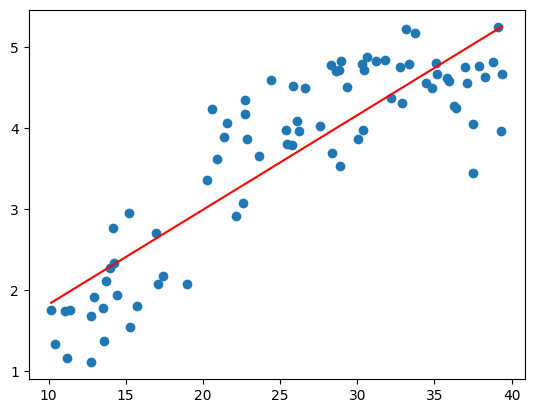

In [30]:
data1 = np.loadtxt('data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

plt.scatter(X,Y)
X = np.hstack((np.ones((X.shape[0],1)),X))
theta = normal_equation(X,Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')


多项式回归的最大优点就是可以通过增加$X$的高次项对实测点进行逼近，直至满意为止。事实上，多项式回归可以处理相当一类非线性问题，它在回归分析中占有重要的地位，**因为任一函数都可以分段用多项式来逼近**。因此，在通常的实际问题中，不论依变量与其他自变量的关系如何，我们总可以用多项式回归来进行分析。假设数据的特征只有一个$a$，多项式的最高次数为$K$，那么多项式回归方程为：
$$
h(x) = \theta^T x = \theta_0 \times a^0 + \theta_1 \times a^1 + \theta_2 \times a^2 + \cdots + \theta_K \times a^K。
$$
若令$x = \begin{bmatrix} a^0, a^1, a^2, \cdots, a^K \end{bmatrix}^T$，那么
$$
h(x) = \theta^T x = \theta_0 \times x_0 + \theta_1 \times x_1 + \theta_2 \times x_2, \cdots, \theta_K \times x_K，
$$
这就变为多变量线性回归了。

### **任务12：**
现在想要得到一个如下的多项式模型，$K=2$，直接用上面的正规方程进行求解。
$$
    h(x) = \theta^T x = \theta_0 \times 1 + \theta_1 \times x + \theta_2 \times x^2。
$$
输入数据$X$变为:
$$
\begin{bmatrix} x^{(0)} \\ x^{(1)} \\ \vdots \\x^{(m-1)}  \end{bmatrix} \longrightarrow
\begin{bmatrix} 1\quad x^{(0)}\quad {x^{(0)}}^2 \\ 1\quad x^{(1)} \quad {x^{(1)}}^2\\ \vdots \\ 1\ x^{(m-1)}\quad {x^{(m-1)}}^2  \end{bmatrix}。
$$

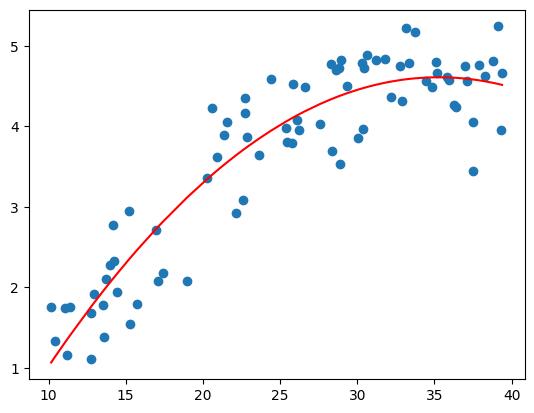

In [31]:
data1 = np.loadtxt('data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

m = X.shape[0]    # m 是数据X的行数
X_square = np.power(X,2)

### START CODE HERE ###

# 对X 前面加1， 后面加平方，变为 m x 3 的矩阵
X = np.hstack((np.ones((m,1)),X))
X = np.hstack((X,X_square))

# 用法线方程求解theta
theta = normal_equation(X, Y)

### END CODE HERE ###

plt.scatter(X[:,1],Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')

所有任务到这里就结束了，下面是对上面的数据进行任意多项式拟合的结果，你可以通过改变$K$的值来调整多项式的阶数，看看不同模型的效果(但不设的太大, $K \le 193$)。可以看到，越复杂的模型，虽然拟合数据的效果越好，但是其泛化能力就会很差，所以模型的选择应该要尽量符合实际需求。

## 利用sklearn中pipeline构建机器学习工作流
https://zhuanlan.zhihu.com/p/42368821

pipeline 实现了对全部步骤的流式化封装和管理（streaming workflows with pipelines），可以很方便地使参数集在新数据集（比如测试集）上被重复使用。

Pipeline可以将许多算法模型串联起来，比如将特征提取、归一化、分类组织在一起形成一个典型的机器学习问题工作流。主要带来两点好处：

1. 直接调用fit和predict方法来对pipeline中的所有算法模型进行训练和预测。

2. 可以结合grid search对参数进行选择。

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())    
    ])
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

K = 20  #可以调整K的值(0<=K<=193)
poly_reg = PolynomialRegression(degree=K)
poly_reg.fit(X,Y.squeeze())
y_predict = poly_reg.predict(X)
plt.scatter(X,Y)
plt.plot(np.sort(X[:,0]),y_predict[np.argsort(X[:,0])],color='r')

ModuleNotFoundError: No module named 'sklearn'

## 学习调包sklearn (Optional)




In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


data = np.loadtxt("data.txt")
# data 数据第一列为人口信息
X_data = data[:, 0].reshape(-1,1)
# data 数据第三列为城市峰值用电量
y_data = data[:, 2].reshape(-1,1)
print("X shape: ", X_data.shape)
print("y shape: ", y_data.shape)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_data, y_data)

X_test = np.array([[8], [45]])
y_pred = linear_reg.predict(X_test)
plt.plot(X_data,y_data,".")
plt.plot(X_test, y_pred,"r-")
plt.xlabel("Temperture")
plt.ylabel("PeakDemand")
plt.title("Linear Regression model predictions")
plt.show()